# Data Understanding & Data Preparation

### Import Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

client = 'TOOL_CLIENT.csv'
sales  = 'TOOL_SALES.csv'
joint = 'TOOL_JOINT.csv'

In [2]:
df_client = pd.read_csv(client)
df_sales = pd.read_csv(sales)

df = pd.merge(df_client, df_sales, on='CLIENT_ID')

# df = pd.read_csv(joint)

# lower case and replace spaces with underscores in column names
original_columns = df.columns
renamed_columns = [col.lower().replace(" ", "_") for col in original_columns]
column_mapping = dict(zip(original_columns, renamed_columns))
df.rename(columns=column_mapping, inplace=True)

df.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/751546178.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(sales)


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   client_id           int64  
 1   client_create_date  object 
 2   region              object 
 3   trade_sector        int64  
 4   n_employees         int64  
 5   economic_pot        float64
 6   eco_pot_class       object 
 7   risk_cat            object 
 8   yyyymm              int64  
 9   item_id             int64  
 10  flg_tool            int64  
 11  sales_channel       object 
 12  net                 float64
 13  unit                object 
 14  family_code         object 
 15  group_code          object 
 16  cancelled           object 
dtypes: float64(2), int64(6), object(9)
memory usage: 265.9+ MB


In [4]:
# converting date columns to datetime
df['client_create_date'] = pd.to_datetime(df['client_create_date'])
df['yyyymm'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m')

# converting other columns to appropriate data types
df['client_id'] = df['client_id'].astype(str)
df['cancelled'] = df['cancelled'] == 'X'
df['unit'] = df['unit'] == 'P'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  unit                bool          
 14  family_code         object        
 15  group_code          object        
 16  cancelled           bool          
dtypes: bool(2), datetime64[ns](2), float64(2), int64(4), object(7)
memory usage: 238.6+ MB


In [6]:
# exporting the merged data

# df.to_csv('TOOL_JOINT.csv', index=False)

Create a new variable to identify client

Create a new variable to identify unique sales

In [7]:
# creating a new column for identifie the unique sales
df['sales_id'] = df['client_id'].astype(str) + '_' + df['yyyymm'].dt.strftime('%Y%m')

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,0,B,64.51,True,XAES4AA,XAES4AA0101,True,939_201705


In [8]:
# creating new dataframes with no canceled orders
no_canceled = df[df['cancelled'] == False]
no_canceled.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,True,XBSI4AA,XBSI4AA0101,False,8321_201804


In [9]:
# checking the number of unique sales per client
client_sales_count = no_canceled.groupby('client_id')['sales_id'].nunique().sort_values(ascending=False)
print(client_sales_count)

client_id
51708    60
19562    58
9659     58
27926    58
37126    57
         ..
39817     1
7320      1
73199     1
56057     1
1         1
Name: sales_id, Length: 85714, dtype: int64


In [10]:
client_sales_count.describe()

count    85714.000000
mean         5.147432
std          6.579728
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         60.000000
Name: sales_id, dtype: float64

In [11]:
# filtering the clients with more than one sale
client_sales_count.drop(client_sales_count[client_sales_count < 2].index, inplace=True)

pluri_client = no_canceled[no_canceled['client_id'].isin(client_sales_count.index)]
pluri_client['n_purchases'] = pluri_client.groupby('client_id')['sales_id'].transform('nunique')

print(pluri_client.shape)
print(pluri_client.info())

(1840920, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 1840920 entries, 0 to 2048901
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  unit                bool          
 14  family_code         object        
 15  group_code          object        
 16  cancelled           bool          
 17  sales_id            object        
 18  n_purchases         int64         
dtypes: bool(2), datetime64[ns](2), fl

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_13293/581676336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['n_purchases'] = pluri_client.groupby('client_id')['sales_id'].transform('nunique')


In [12]:
pluri_client.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id,n_purchases
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709,2
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709,2
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709,2
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010,2
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,True,XBSI4AA,XBSI4AA0101,False,8321_201804,7


In [13]:
for c in pluri_client.columns:
    print(c)
    print(pluri_client[c].value_counts())

client_id
client_id
49196    2616
51708     997
48285     783
48195     737
45393     674
         ... 
54068       2
54022       2
81962       2
53989       2
92957       2
Name: count, Length: 55359, dtype: int64
client_create_date
client_create_date
2005-11-15    334061
2005-11-16    235874
2007-06-03      9872
2007-06-05      5471
2007-06-06      5455
               ...  
2020-04-23         2
2021-04-23         2
2016-12-10         2
2008-08-22         2
2021-10-20         2
Name: count, Length: 4014, dtype: int64
region
region
RM    76280
MI    73463
FI    68694
BO    55645
TO    53980
      ...  
2A       27
03       25
06        8
08        6
ST        3
Name: count, Length: 115, dtype: int64
trade_sector
trade_sector
11000    647069
13500    267414
21100    228873
22100    140754
15100     81162
          ...  
38000         9
37420         8
39700         6
39000         4
12100         2
Name: count, Length: 145, dtype: int64
n_employees
n_employees
1       366620
2       295

We have now a new dataset cointaining only client with more than one purchase

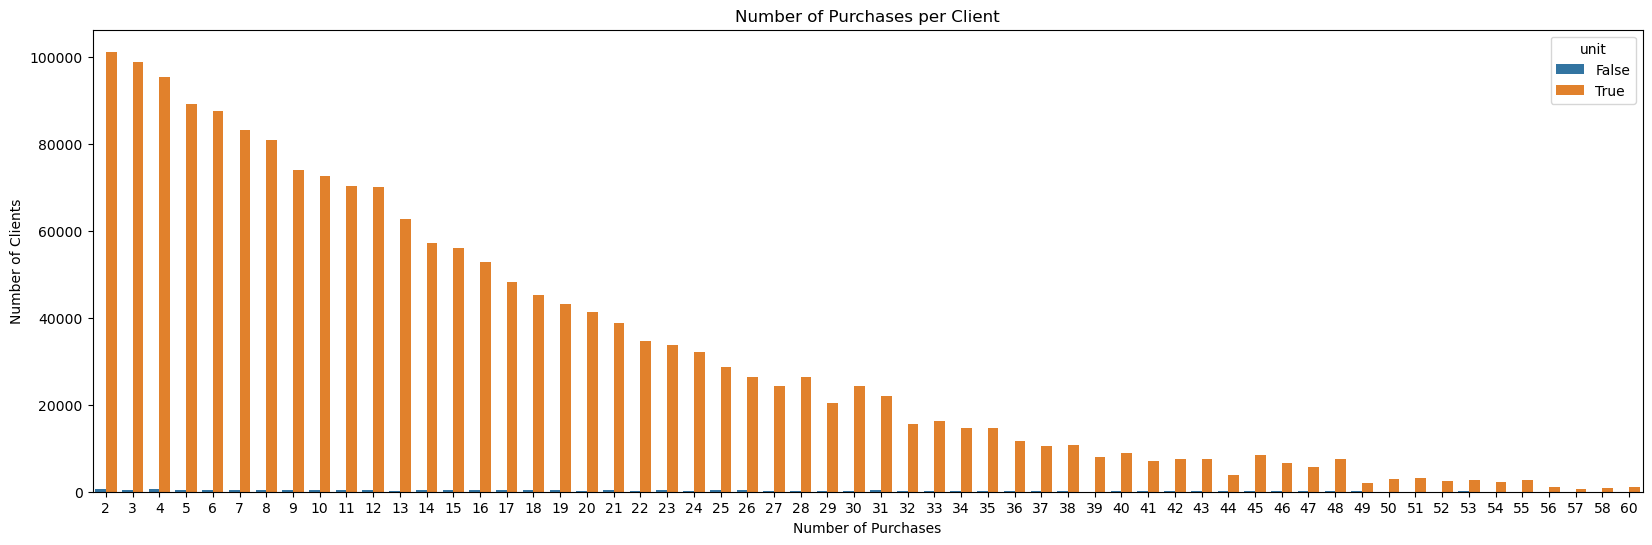

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(x='n_purchases', data=pluri_client, hue='unit')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Clients')
plt.title('Number of Purchases per Client')
plt.show()

On this point I'd like asking business about articles that aren't "Unit". I suppose that could be substitute parts for other articles or similar, which a client buys because it absolutly needs it and a marketing campaign about is unuseful. So I decide to drop rows containing non-piece units

In [15]:
# dropping unnecessary columns
pluri_client.drop(pluri_client[pluri_client['unit'] == False].index, inplace=True)
pluri_client.drop('unit', axis=1, inplace=True)
pluri_client.drop('cancelled', axis=1, inplace=True)

pluri_client.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/4086462661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop(pluri_client[pluri_client['unit'] == False].index, inplace=True)
/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/4086462661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop('unit', axis=1, inplace=True)
/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/4086462661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7


In [16]:
pluri_client.shape

(1827763, 17)

### Next steps: 
- Days since last purchase for same client
- Analyze time between purchases

- Create a DF with total amount for each sales_id

In [17]:
# extracting new variables
sales_net = pluri_client.groupby('sales_id')['net'].sum()   # total sales per sale
sales_n_purchases = pluri_client.groupby('sales_id')['n_purchases'].max()   # number of purchases per sale

sales_time = pluri_client[['sales_id', 'client_id', 'yyyymm']].drop_duplicates().set_index('client_id')   # time of the sale
sales_time = sales_time.sort_values(by=['client_id', 'yyyymm'])

sales_time['time_diff'] = sales_time.groupby('client_id')['yyyymm'].diff().dt.days  # time between sales
sales_id_time_diff = sales_time[['sales_id', 'time_diff']].set_index('sales_id')    # time between sales per sale (to easly merge with the main dataframe)

In [18]:
# adding the new variables to the main dataframe
sales_time = pluri_client[['sales_id', 'client_id', 'yyyymm']].drop_duplicates().set_index('client_id')   # time of the sale
sales_time = sales_time.sort_values(by=['client_id', 'yyyymm'])

sales_time['time_diff'] = sales_time.groupby('client_id')['yyyymm'].diff().dt.days  # time between sales
sales_id_time_diff = sales_time[['sales_id', 'time_diff']].set_index('sales_id')    # time between sales per sale (to easly merge with the main dataframe)

pluri_client['sales_net'] = pluri_client['sales_id'].map(sales_net)
pluri_client['time_diff'] = pluri_client['sales_id'].map(sales_id_time_diff['time_diff'].to_dict())
pluri_client.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/3598497995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['sales_net'] = pluri_client['sales_id'].map(sales_net)
/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/3598497995.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['time_diff'] = pluri_client['sales_id'].map(sales_id_time_diff['time_diff'].to_dict())


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,NaN
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,NaN


In [19]:
sales_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409520 entries, 10 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   sales_id   409520 non-null  object        
 1   yyyymm     409520 non-null  datetime64[ns]
 2   time_diff  354184 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.5+ MB


In [20]:
# creating a new dataframe for sales
sales_net = sales_net.reset_index()
sales_n_purchases = sales_n_purchases.reset_index()
sales_time.reset_index(inplace=True)

merged = pd.merge(sales_time, sales_net, on='sales_id')
sales = pd.merge(merged, sales_n_purchases, on='sales_id')

In [21]:
# adding the new variables to the sales dataframe
sales_columns = ['region', 'trade_sector', 'n_employees', 'economic_pot',
                 'eco_pot_class', 'risk_cat', 'flg_tool', 'sales_channel', 'sales_id']  # columns to be added to the sales dataframe

for c in sales_columns: # adding the columns to the sales dataframe
    col = pluri_client.groupby('sales_id')[c].first()
    sales = pd.merge(sales, col, left_on='sales_id', right_index=True)

sales.drop(['sales_id_x', 'sales_id_y'], axis=1, inplace=True)

In [22]:
sales.head(10)

,sales_id,client_id,yyyymm,time_diff,net,n_purchases,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,flg_tool,sales_channel
0,10_201904,10,2019-04-01,NaN,23.25,2,PN,21100,1,7000.00,D,5a,0,B
1,10_202103,10,2021-03-01,700.0,294.70,2,PN,21100,1,7000.00,D,5a,0,B
2,100_201702,100,2017-02-01,NaN,148.01,5,PT,11100,2,2345.86,E,3a,0,B
3,100_201804,100,2018-04-01,424.0,531.73,5,PT,11100,2,2345.86,E,3a,0,B
4,100_201904,100,2019-04-01,365.0,113.64,5,PT,11100,2,2345.86,E,3a,0,B
5,100_201905,100,2019-05-01,30.0,599.00,5,PT,11100,2,2345.86,E,3a,1,B
6,100_202104,100,2021-04-01,701.0,864.80,5,PT,11100,2,2345.86,E,3a,0,B
7,10000_201701,10000,2017-01-01,NaN,97.46,5,MI,11000,1,1509.51,E,3d,1,B
8,10000_201711,10000,2017-11-01,304.0,47.28,5,MI,11000,1,1509.51,E,3d,1,B
9,10000_201712,10000,2017-12-01,30.0,1117.92,5,MI,11000,1,1509.51,E,3d,0,B


P.S. de-comment the follow cell to save files

In [24]:
sales.to_csv('sales.csv', index=False)
pluri_client.to_csv('TOOLS_PREP.csv', index=False)

Now we have 2 DataFrame to use for our analysis
- df: the complete DataFrame with all the variables
- sales: the DataFrame with the details of sales

## Working on association rules

In [25]:
# one-hot encoding the itemsets for the apriori algorithm
itemsets_series = pluri_client.groupby('client_id')['item_id'].apply(list)
encoder = TransactionEncoder()
itemsets = itemsets_series.tolist()

onehot = encoder.fit_transform(itemsets, sparse=True)
onehot = pd.DataFrame.sparse.from_spmatrix(onehot, columns = encoder.columns_)
onehot.columns = [str(col) for col in onehot.columns]
onehot.info()

frequent_itemsets = apriori(onehot, min_support=0.01, max_len = 4, use_colnames=True, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
print(len(rules))

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/3472175498.py:7: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  onehot = pd.DataFrame.sparse.from_spmatrix(onehot, columns = encoder.columns_)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55336 entries, 0 to 55335
Columns: 14048 entries, 1 to 14581
dtypes: Sparse[bool, 0](14048)
memory usage: 6.0 MB
46662


In [26]:
# filtering and ordering the rules
rules.sort_values(by=['support', 'confidence'], ascending=False, inplace=True)
print('We have a total of {} rules'.format(rules.shape[0]))
rules.head(20)

We have a total of 46662 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
269,(3351),(585),0.368675,0.421118,0.308100,0.835694,1.984465,0.152844,3.523200,0.785785
270,(585),(3351),0.421118,0.368675,0.308100,0.731623,1.984465,0.152844,2.352377,0.856973
811,(1737),(1716),0.193689,0.199689,0.187238,0.966692,4.840981,0.148560,24.027259,0.984026
810,(1716),(1737),0.199689,0.193689,0.187238,0.937647,4.840981,0.148560,12.931395,0.991403
271,(3352),(585),0.202057,0.421118,0.165823,0.820678,1.948806,0.080734,3.228168,0.610150
272,(585),(3352),0.421118,0.202057,0.165823,0.393769,1.948806,0.080734,1.316237,0.841045
183,(917),(585),0.193256,0.421118,0.160691,0.831494,1.974491,0.079308,3.435384,0.611768
184,(585),(917),0.421118,0.193256,0.160691,0.381582,1.974491,0.079308,1.304529,0.852576
639,(917),(3351),0.193256,0.368675,0.142565,0.737703,2.000959,0.071317,2.406912,0.620072
638,(3351),(917),0.368675,0.193256,0.142565,0.386697,2.000959,0.071317,1.315408,0.792364


In [27]:
pluri_client.head(20)

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,NaN
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,NaN
8,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-05-01,8666,0,B,5.96,XAEG4AA,XAEG4AA0101,8321_201805,7,5.96,30.0
9,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-08-01,8662,0,B,22.26,XAEG4AA,XAEG4AA0101,8321_201908,7,22.26,457.0
10,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-12-01,12478,1,B,117.65,XAES2AC,XAES2AC0201,8321_201912,7,117.65,122.0
11,8321,2005-11-15,LE,15500,2,681.26,E,T8,2020-05-01,7187,0,B,10.08,XAEG4AA,XAEG4AA0101,8321_202005,7,10.08,152.0
12,8321,2005-11-15,LE,15500,2,681.26,E,T8,2021-07-01,6776,0,B,22.74,XBSI4AA,XBSI4AA0101,8321_202107,7,22.74,426.0


In [28]:
sales.head(20)

,sales_id,client_id,yyyymm,time_diff,net,n_purchases,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,flg_tool,sales_channel
0,10_201904,10,2019-04-01,NaN,23.25,2,PN,21100,1,7000.00,D,5a,0,B
1,10_202103,10,2021-03-01,700.0,294.70,2,PN,21100,1,7000.00,D,5a,0,B
2,100_201702,100,2017-02-01,NaN,148.01,5,PT,11100,2,2345.86,E,3a,0,B
3,100_201804,100,2018-04-01,424.0,531.73,5,PT,11100,2,2345.86,E,3a,0,B
4,100_201904,100,2019-04-01,365.0,113.64,5,PT,11100,2,2345.86,E,3a,0,B
5,100_201905,100,2019-05-01,30.0,599.00,5,PT,11100,2,2345.86,E,3a,1,B
6,100_202104,100,2021-04-01,701.0,864.80,5,PT,11100,2,2345.86,E,3a,0,B
7,10000_201701,10000,2017-01-01,NaN,97.46,5,MI,11000,1,1509.51,E,3d,1,B
8,10000_201711,10000,2017-11-01,304.0,47.28,5,MI,11000,1,1509.51,E,3d,1,B
9,10000_201712,10000,2017-12-01,30.0,1117.92,5,MI,11000,1,1509.51,E,3d,0,B


In [28]:
# extracting new variables
df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,0,B,64.51,True,XAES4AA,XAES4AA0101,True,939_201705


In [29]:
pluri_client.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,NaN
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,NaN


## Creating final dataframe for the model with target variable
- target = 1 for client who made a purchase after 2 years from the last purchase
- target = 0 for client who didn't make 2 purchases

In [28]:
# extracting interesting columns from pluri_client
to_merge_client = pluri_client[['client_id', 'n_purchases']].drop_duplicates()
to_merge_sales = pluri_client[['sales_id', 'sales_net', 'time_diff']].drop_duplicates()

# merge columns to the main dataframe
df = pd.merge(df, to_merge_client, on='client_id', how='left')
df = pd.merge(df, to_merge_sales, on='sales_id', how='left')

df['n_purchases'].fillna(1.00, inplace=True)

df.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_19819/1625228392.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['n_purchases'].fillna(1.00, inplace=True)


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,...,sales_channel,net,unit,family_code,group_code,cancelled,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,...,C,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709,2.0,1579.03,NaN
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,...,C,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709,2.0,1579.03,NaN
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,...,C,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709,2.0,1579.03,NaN
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,...,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010,2.0,1341.14,1126.0
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,...,B,64.51,True,XAES4AA,XAES4AA0101,True,939_201705,1.0,NaN,NaN


In [ ]:
df_model = df.drop(df[df['cancelled'] == True].index)   # dropping the canceled orders
df_model.drop('cancelled', axis=1, inplace=True)    # dropping the canceled column
df_model.drop(df[df['time_diff'] < 730].index, inplace=True)  # dropping the sales with less than 2 years between them


# creating the target variable
df_model['target'] = np.where(df_model['n_purchases'] > 1, 1, 0)

df_model.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,...,sales_channel,net,unit,family_code,group_code,sales_id,n_purchases,sales_net,time_diff,target
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,...,C,937.94,True,XBXV2EB,XBXV2EB0102,9306_201709,2.0,1579.03,NaN,1
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,...,C,641.09,True,XBXV2AB,XBXV2AB0102,9306_201709,2.0,1579.03,NaN,1
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,...,C,0.00,True,XBXV2EB,XBXV2EB0102,9306_201709,2.0,1579.03,NaN,1
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,...,C,1341.14,True,XBXV1AF,XBXV1AF0201,9306_202010,2.0,1341.14,1126.0,1
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,...,B,20.02,True,XBSI4AA,XBSI4AA0101,8321_201804,7.0,20.02,NaN,1


In [30]:
df_model['target'].value_counts()

target
1    314151
0    106890
Name: count, dtype: int64